In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

data100 = pd.read_csv('dataset/100.csv')
data100.head()

'sample #'  'MLII'  'V5'
0           0     995  1011
1           1     995  1011
2           2     995  1011
3           3     995  1011
4           4     995  1011

In [33]:
annote = []
times = []
periods = []
classes = []
with open('dataset/100annotations.txt','r') as txtfile:
    data = txtfile.readlines()
    first = data[1].split()
    times.append(first[0])
    periods.append(int(first[1]))
    classes.append('/')
    for row in data[2:]:
        annote.append(row.split())
        times.append(row.split()[0])
        periods.append(int(row.split()[1]))
        classes.append(row.split()[2])
        
# print("전체 annote")        
# print(annote)

# print("시간")
# print(times)

print("샘플수")
print(periods)

print("정상/비정상 분류")
# print(classes)

샘플수
[18, 77, 370, 662, 946, 1231, 1515, 1809, 2044, 2402, 2706, 2998, 3282, 3560, 3862, 4170, 4466, 4764, 5060, 5346, 5633, 5918, 6214, 6527, 6823, 7106, 7391, 7670, 7953, 8245, 8539, 8837, 9141, 9431, 9710, 9998, 10282, 10591, 10894, 11191, 11480, 11781, 12066, 12350, 12645, 12949, 13266, 13562, 13842, 14131, 14423, 14710, 15011, 15310, 15607, 15899, 16183, 16464, 16755, 17058, 17358, 17657, 17947, 18227, 18514, 18795, 19080, 19388, 19693, 19989, 20271, 20554, 20837, 21131, 21423, 21729, 22029, 22321, 22603, 22881, 23164, 23453, 23756, 24053, 24345, 24625, 24913, 25197, 25485, 25779, 26088, 26387, 26670, 26952, 27237, 27536, 27833, 28132, 28431, 28727, 29014, 29294, 29580, 29873, 30182, 30487, 30779, 31065, 31348, 31635, 31927, 32224, 32529, 32836, 33127, 33403, 33691, 33980, 34274, 34575, 34870, 35168, 35455, 35736, 36016, 36309, 36605, 36916, 37215, 37499, 37782, 38071, 38356, 38651, 38950, 39252, 39547, 39825, 40096, 40382, 40677, 40970, 41271, 41567, 41849, 42117, 42416, 42697, 42

In [2]:
volt_step = 10/(2**11)
data100["'MLII'"] = (data100["'MLII'"] * volt_step)
data100["'V5'"] = (data100["'V5'"] * volt_step)

data100.head()

'sample #'    'MLII'      'V5'
0           0  4.858398  4.936523
1           1  4.858398  4.936523
2           2  4.858398  4.936523
3           3  4.858398  4.936523
4           4  4.858398  4.936523

In [3]:
data100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650000 entries, 0 to 649999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   'sample #'  650000 non-null  int64  
 1   'MLII'      650000 non-null  float64
 2   'V5'        650000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 14.9 MB


In [4]:
sec_step = 0.0027
sample_num = 650000
total_time = sec_step * sample_num

second = np.arange(0, total_time, sec_step)
second

array([0.0000000e+00, 2.7000000e-03, 5.4000000e-03, ..., 1.7549919e+03,
       1.7549946e+03, 1.7549973e+03])

In [5]:
plt.figure(figsize = (510,100))
plt.plot(second, data100["'MLII'"], 'r')

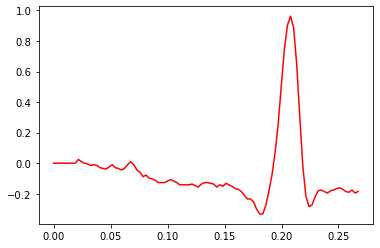

In [6]:
num = 100 #행 개수
end = sec_step*num

data100_MLII = data100["'MLII'"]
data100_MLII -= data100["'MLII'"][0]
data100_MLII100 = data100_MLII.iloc[:num]
second_ = np.arange(0, end, sec_step)


plt.plot(second_, data100_MLII100, 'r')

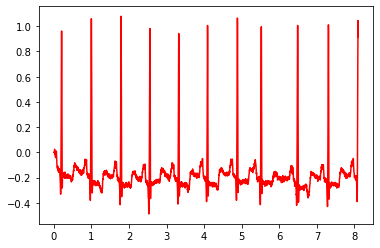

In [65]:
num = 3000
end = sec_step*num

data100_MLII800 = data100_MLII.iloc[:num]
second_2 = np.arange(0, end, sec_step)


plt.plot(second_2, data100_MLII800, 'r')

In [66]:
R = find_peaks(data100_MLII800, prominence = 1)

R = R[0]
S = []
Q = []
C = []
Cl = []
for i in range(len(R)):
    a = R[i]
    while data100_MLII800[a] - data100_MLII800[a-1] >= 0:
        a -= 1
    Q.append(a)
    
    a = R[i]
    while data100_MLII800[a+1] - data100_MLII800[a] <= 0:
        a += 1
    S.append(a)
    C.append(periods[i+1])
    Cl.append(classes[i+1])

print(Q)
print(R)
print(S)
print(C)
print(Cl)

[67, 360, 654, 936, 1222, 1505, 1800, 2035, 2393, 2697]
[  77  370  663  947 1231 1515 1809 2045 2403 2706]
[83, 379, 669, 953, 1237, 1521, 1816, 2050, 2411, 2712]
[77, 370, 662, 946, 1231, 1515, 1809, 2044, 2402, 2706]
['N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N']


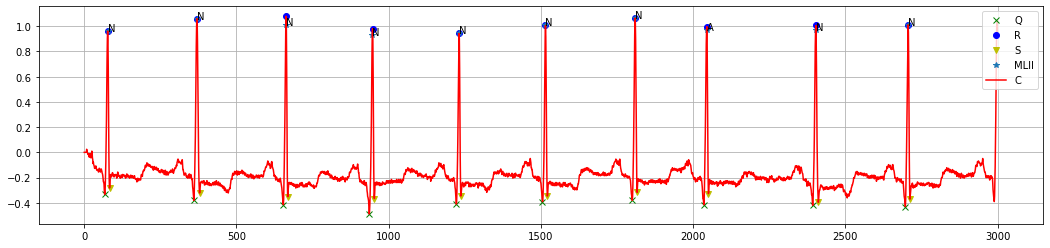

In [67]:
plt.figure(figsize=(18,4))
plt.plot(Q, data100_MLII800[Q], "xg")
plt.plot(R, data100_MLII800[R], "ob")
plt.plot(S, data100_MLII800[S], "vy")
plt.plot(C, data100_MLII800[C], "*")
for i, v in enumerate(Cl):
    plt.text(C[i], data100_MLII800[C[i]], v)

plt.plot(data100_MLII800, "r")

plt.legend(['Q','R','S','MLII', 'C'],loc = 'upper right')
plt.grid()

In [75]:
window = []
for i in R:
    window.append([i-50, i+50])

In [76]:
for i in range(len(window)-1):
    array = np.corrcoef(data100_MLII800[window[i][0]:window[i][1]], data100_MLII800[window[i+1][0]:window[i+1][1]])
    print(array)

[[1.         0.97470127]
 [0.97470127 1.        ]]
[[1.         0.96081984]
 [0.96081984 1.        ]]
[[1.         0.99055053]
 [0.99055053 1.        ]]
[[1.         0.97806878]
 [0.97806878 1.        ]]
[[1.         0.99422086]
 [0.99422086 1.        ]]
[[1.         0.98707649]
 [0.98707649 1.        ]]
[[1.         0.95079255]
 [0.95079255 1.        ]]
[[1.         0.97772926]
 [0.97772926 1.        ]]
[[1.         0.98720078]
 [0.98720078 1.        ]]


In [77]:
for i in range(len(window)-1):
    array = np.corrcoef(data100_MLII800[window[i][0]:window[i][1]], data100_MLII800[window[i+1][0]:window[i+1][1]])
    print(i+1,"번째 신호의 Corr1 : ",array[0][1])

1 번째 신호의 Corr1 :  0.9747012676100766
2 번째 신호의 Corr1 :  0.9608198401469454
3 번째 신호의 Corr1 :  0.9905505277099896
4 번째 신호의 Corr1 :  0.9780687813537005
5 번째 신호의 Corr1 :  0.9942208560357695
6 번째 신호의 Corr1 :  0.9870764947031864
7 번째 신호의 Corr1 :  0.9507925460685455
8 번째 신호의 Corr1 :  0.9777292642442362
9 번째 신호의 Corr1 :  0.9872007754472277


In [78]:
for i in range(len(window)-1):
    array = np.corrcoef(data100_MLII800[window[i][0]:window[i][1]], data100_MLII800[window[i+1][0]:window[i+1][1]])
    print(i+2,"번째 Corr2 : ",array[0][1])

2 번째 Corr2 :  0.9747012676100766
3 번째 Corr2 :  0.9608198401469454
4 번째 Corr2 :  0.9905505277099896
5 번째 Corr2 :  0.9780687813537005
6 번째 Corr2 :  0.9942208560357695
7 번째 Corr2 :  0.9870764947031864
8 번째 Corr2 :  0.9507925460685455
9 번째 Corr2 :  0.9777292642442362
10 번째 Corr2 :  0.9872007754472277


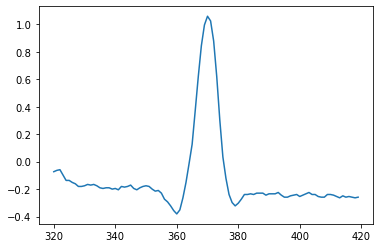

In [81]:
# 그냥 두번째 N신호 가져옴
normal_signal = data100_MLII800[window[1][0]:window[1][1]]
plt.plot(normal_signal)
plt.show()

In [82]:
array = np.corrcoef(normal_signal, data100_MLII800[window[7][0]:window[7][1]])
print("두 번째(N) 신호와 여덟번째(A) 신호 상관관계",array[0][1])

첫 번째(N) 신호와 여덟번째(A) 신호 상관관계 0.9525391111676406
